# A double-well potential

Consider the double-well potential 

$$
    V(x) = -\frac{1}{2}x^2 + \frac{1}{4}x^4
$$

In [1]:
using Plots

In [14]:
default(size=(450, 300))

We can transform this system into two first-order ODEs:

$$
\begin{align*}
    \dot x &= y\\
    \dot y &= x - x^3
\end{align*}
$$

In [23]:
"""
Implementation of a fourth-order Runge-Kutta ODE
solver

Parameters
----------
fs: Tuple
    Collection of m functions for the ode
    ẋ = f(x)
initial_conditions: Array
    Collection of m initial conditions
Δt: float
    Timestep size
T: float / int
    Time of integration

Returns
-------
Array of size (T / Δt + 1, m) of the integration
the system from 0 to T
"""
function rk4(fs, initial_conditions, Δt, T)
    yn = initial_conditions[:]
    n_steps = Int(T / Δt + 1)
    n_params = length(initial_conditions)
    
    hist = zeros(n_steps, n_params)
    hist[1, :] = yn
    
    for ti=2:n_steps
        k1 = Δt .* [f(yn...) for f in fs]
        k2 = Δt .* [f(yn + k1 / 2...) for f in fs]
        k3 = Δt .* [f(yn + k2 / 2...) for f in fs]
        k4 = Δt .* [f(yn + k3...) for f in fs]
        yn = yn + (k1 + 2k2 + 2k3 + k4) / 6
        hist[ti, :] = yn
    end
    
    return hist
end

rk4

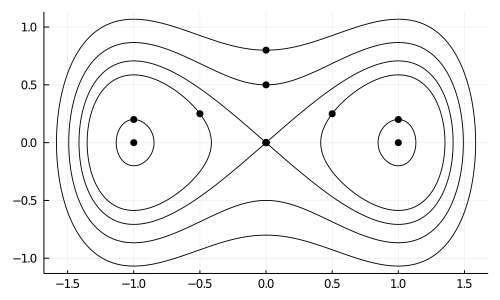

In [162]:
T = 20
dt = 0.01
timesteps = Int(ceil(T / dt + 1))
system = ((x, y) -> y, (x, y) -> x - x ^ 3)

cond0 = [0, 1]
initial_conditions = [
    [0, 0], [1, 0], [-1, 0],
    [-1, 0.2], [1, 0.2],
    [0, 0.5], [-0.5, 0.25], [0.5, 0.25],
    [0.001, 0.001], [-0.001, -0.001], [0, 0.8]]

n_conditions = length(initial_conditions)
contours = zeros(n_conditions, timesteps, 2)

plot(size=(500, 300))
for (i, cond0) in enumerate(initial_conditions)
    x0, y0 = cond0
    xy_hist = rk4(system, cond0, dt, T)
    plot!(xy_hist[:, 1], xy_hist[:, 2], legend=nothing, c="black", linewidth=0.9)
    scatter!([x0], [y0], c="black")
    contours[i, :, :] = xy_hist
end
plot!()

In [ ]:
V(x) = -x^2 / 2 + x^4 / 4
Δx = 0.1
xrange = -1.6:Δx:1.6

┌ Info: Saved animation to 
│   fn = /Users/gerardoduran/Documents/repos/QMUL/MTH744P-dynamical-systems/tmp.gif
└ @ Plots /Users/gerardoduran/.julia/packages/Plots/vsE7b/src/animation.jl:104


Plots.AnimatedGif("/Users/gerardoduran/Documents/repos/QMUL/MTH744P-dynamical-systems/tmp.gif")
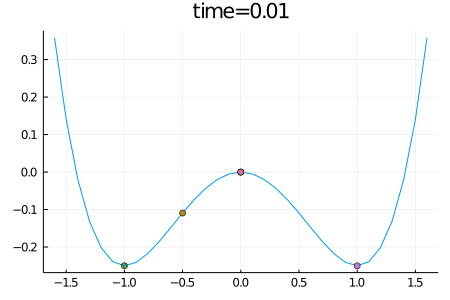

In [163]:
@gif for ti in 1:timesteps
    time = round(dt * ti, digits=2)
    plot(xrange, V.(xrange), label=nothing, title="time=$time")
    # plot!(xy_hist[begin:, 1], V.(xy_hist[:, 1]))
    for ci=1:2:n_conditions
        x0, y0 = initial_conditions[ci]
        scatter!(contours[ci, [ti], 1], V.(contours[ci, [ti], 1]), label=nothing)
        if ti >= 20
            plot!(contours[ci, ti-19:ti, 1], V.(contours[ci, ti-19:ti, 1]),
                label=nothing, linewidth=2, color="orange")
        end
    end
end every 3